<a href="https://colab.research.google.com/github/akm2208/Aayushi-First-Files/blob/main/CIVE7100_Final_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pysal
!pip install libpysal

       Country Code ContinentCode  Year  \
0  Afghanistan  AFG            AS  1960   
1  Afghanistan  AFG            AS  1961   
2  Afghanistan  AFG            AS  1962   
3  Afghanistan  AFG            AS  1963   
4  Afghanistan  AFG            AS  1964   

   Inflation: percent change in the Consumer Price Index  Unemployment rate  \
0                                                NaN                    NaN   
1                                                NaN                    NaN   
2                                                NaN                    NaN   
3                                                NaN                    NaN   
4                                                NaN                    NaN   

   Youth unemployment ages 15-24  Labor force participation rate  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             N

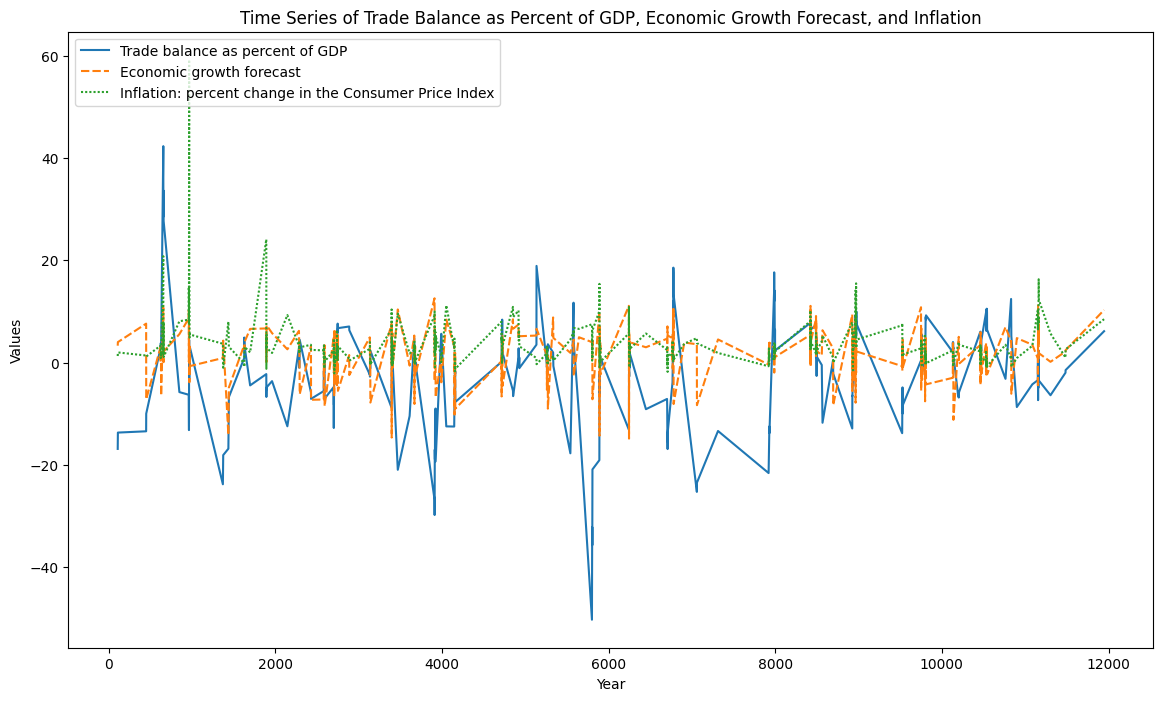


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.1820  , p=0.6699  , df_denom=437, df_num=1
ssr based chi2 test:   chi2=0.1832  , p=0.6686  , df=1
likelihood ratio test: chi2=0.1832  , p=0.6686  , df=1
parameter F test:         F=0.1820  , p=0.6699  , df_denom=437, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.7121  , p=0.1817  , df_denom=434, df_num=2
ssr based chi2 test:   chi2=3.4636  , p=0.1770  , df=2
likelihood ratio test: chi2=3.4500  , p=0.1782  , df=2
parameter F test:         F=1.7121  , p=0.1817  , df_denom=434, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.4577  , p=0.2255  , df_denom=431, df_num=3
ssr based chi2 test:   chi2=4.4442  , p=0.2173  , df=3
likelihood ratio test: chi2=4.4218  , p=0.2194  , df=3
parameter F test:         F=1.4577  , p=0.2255  , df_denom=431, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.4003  , p=0.0494  

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import grangercausalitytests
import geopandas as gpd
from libpysal import weights
from esda import Moran  # Modified import

# Load the CSV file
df = pd.read_csv('ChatGPTDataset.csv')

# Specify column names with special characters
selected_variables = [
    'Country', 'Code', 'ContinentCode', 'Year', 'Inflation: percent change in the Consumer Price Index',
    'Unemployment rate', 'Youth unemployment ages 15-24', 'Labor force participation rate',
    'Foreign Direct Investment percent of GDP', 'Trade balance as percent of GDP',
    'Fiscal balance percent of GDP', 'Government debt as percent of GDP', 'Tax revenue percent of GDP',
    'Economic growth forecast', 'Inflation forecast', 'Carbon dioxide emissions thousands of tonnes',
    'Access to electricity percent of the population', 'Refugee population', 'Health spending as percent of GDP',
    'Poverty percent of population', 'Primary school completion rate', 'Globalization index (0-100)',
    'Fragile state index 0 (low) - 120 (high)', 'Military spending percent of GDP'
]

# Subset the dataframe with selected variables
selected_df = df[selected_variables]

# Display the subset
print(selected_df.head())

# Handle Missing Values
df.dropna(inplace=True)  # For simplicity, dropping rows with missing values

# Update Time Series Plot
plt.figure(figsize=(14, 8))
sns.lineplot(data=df[['Trade balance as percent of GDP', 'Economic growth forecast', 'Inflation: percent change in the Consumer Price Index']])
plt.title('Time Series of Trade Balance as Percent of GDP, Economic Growth Forecast, and Inflation')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(loc='upper left')
plt.show()

# Check for Stationarity and Handle if Necessary

# Granger Causality Test
max_lag = 4
granger_test_result = grangercausalitytests(df[['Trade balance as percent of GDP', 'Economic growth forecast']], max_lag, verbose=True)

# Correlation Analysis
correlation_matrix = df[['Trade balance as percent of GDP', 'Economic growth forecast', 'Inflation: percent change in the Consumer Price Index']].corr()
print("Correlation Matrix:\n", correlation_matrix)

# Lag Analysis
lag_variables = df[['Trade balance as percent of GDP', 'Economic growth forecast', 'Inflation: percent change in the Consumer Price Index']].shift(1)
lag_correlation_matrix = lag_variables.corr()
print("Correlation Matrix for Lagged Variables:\n", lag_correlation_matrix)




In [4]:
# Print the column names in your DataFrame
print(df.columns)


Index(['Country', 'Code', 'ContinentCode', 'Year',
       'Inflation: percent change in the Consumer Price Index',
       'Unemployment rate', 'Youth unemployment ages 15-24',
       'Labor force participation rate',
       'Foreign Direct Investment percent of GDP',
       'Trade balance as percent of GDP', 'Fiscal balance percent of GDP',
       'Government debt as percent of GDP', 'Tax revenue percent of GDP',
       'Economic growth forecast', 'Inflation forecast',
       'Carbon dioxide emissions thousands of tonnes',
       'Access to electricity percent of the population', 'Refugee population',
       'Health spending as percent of GDP', 'Poverty percent of population',
       'Primary school completion rate', 'Globalization index (0-100)',
       'Fragile state index 0 (low) - 120 (high)',
       'Military spending percent of GDP'],
      dtype='object')


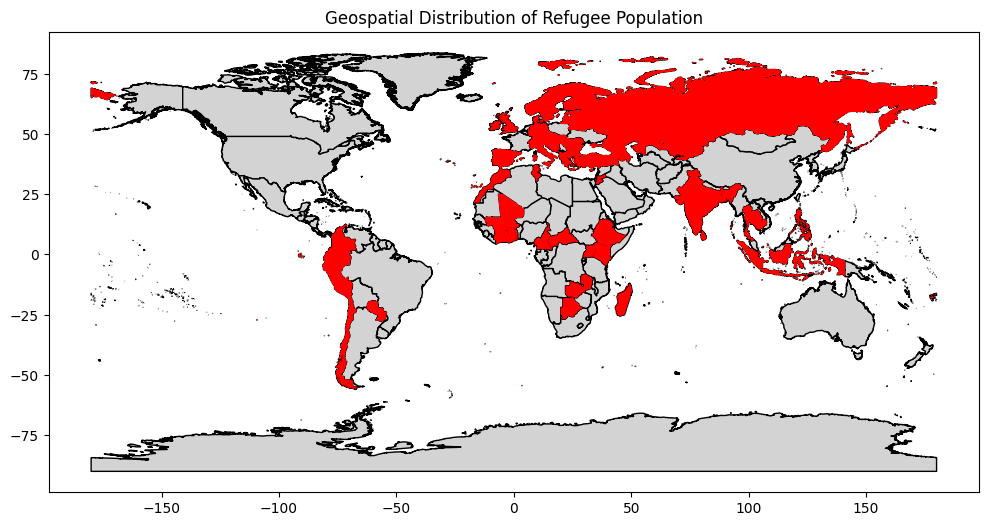

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile
world = gpd.read_file('ne_10m_admin_0_countries.shp')

# Merge the GeoDataFrame with your existing DataFrame on the 'Country' column
merged_df = pd.merge(world, df, left_on='ADMIN', right_on='Country')

# Create a GeoDataFrame with the merged data
gdf = gpd.GeoDataFrame(merged_df)

# Plotting the GeoDataFrame
ax = world.plot(color='lightgray', edgecolor='black', figsize=(12, 8))
gdf.plot(ax=ax, color='red', markersize=10)
plt.title('Geospatial Distribution of Refugee Population')
plt.legend
plt.show()


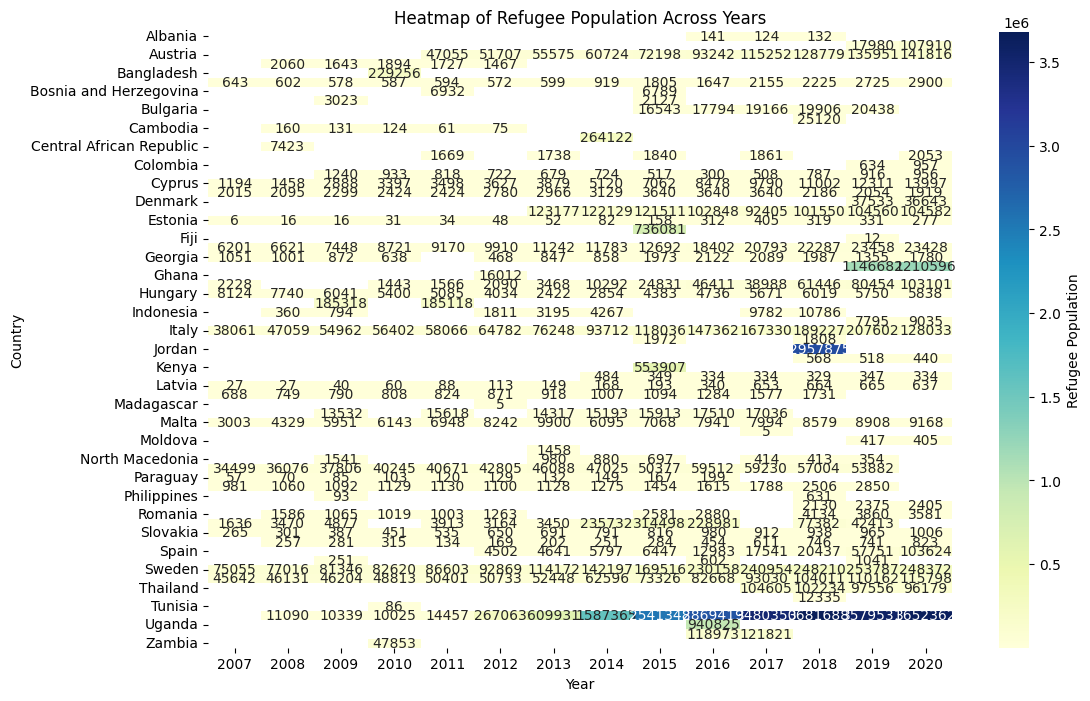

In [6]:
import seaborn as sns

# Heatmap of Refugee Population
plt.figure(figsize=(12, 8))
heatmap_data = gdf.pivot(index='Country', columns='Year', values='Refugee population')
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".0f", cbar_kws={'label': 'Refugee Population'})
plt.title('Heatmap of Refugee Population Across Years')
plt.show()


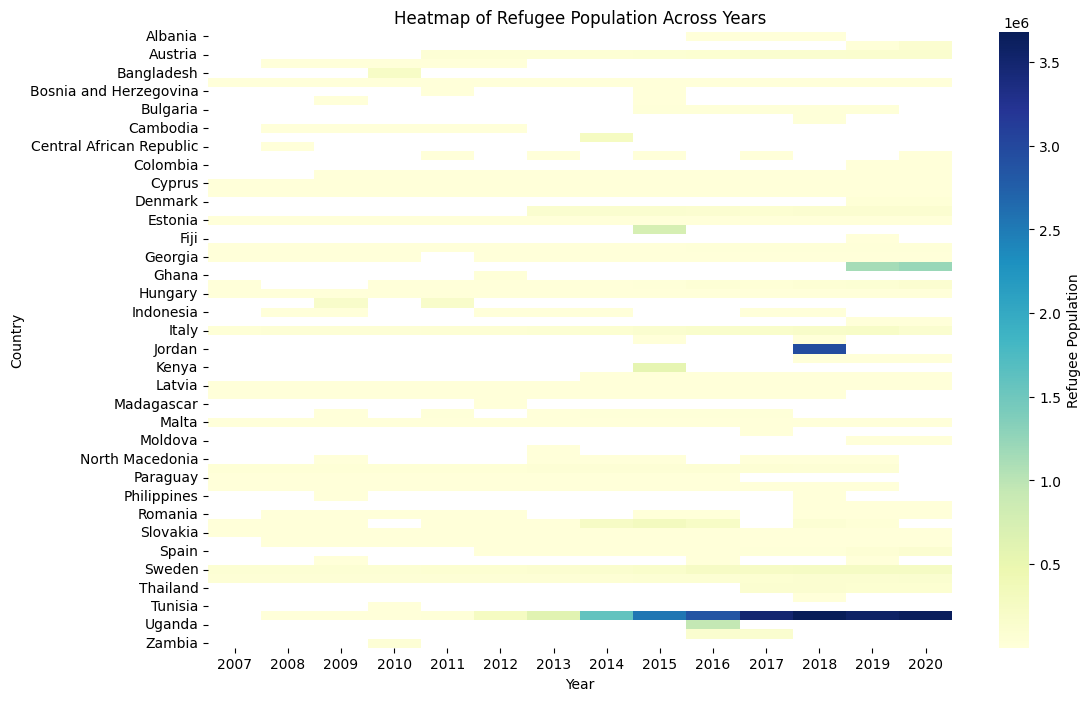

In [7]:
import seaborn as sns

# Heatmap of Refugee Population
plt.figure(figsize=(12, 8))
heatmap_data = gdf.pivot(index='Country', columns='Year', values='Refugee population')
sns.heatmap(heatmap_data, cmap='YlGnBu', cbar_kws={'label': 'Refugee Population'})
plt.title('Heatmap of Refugee Population Across Years')
plt.show()


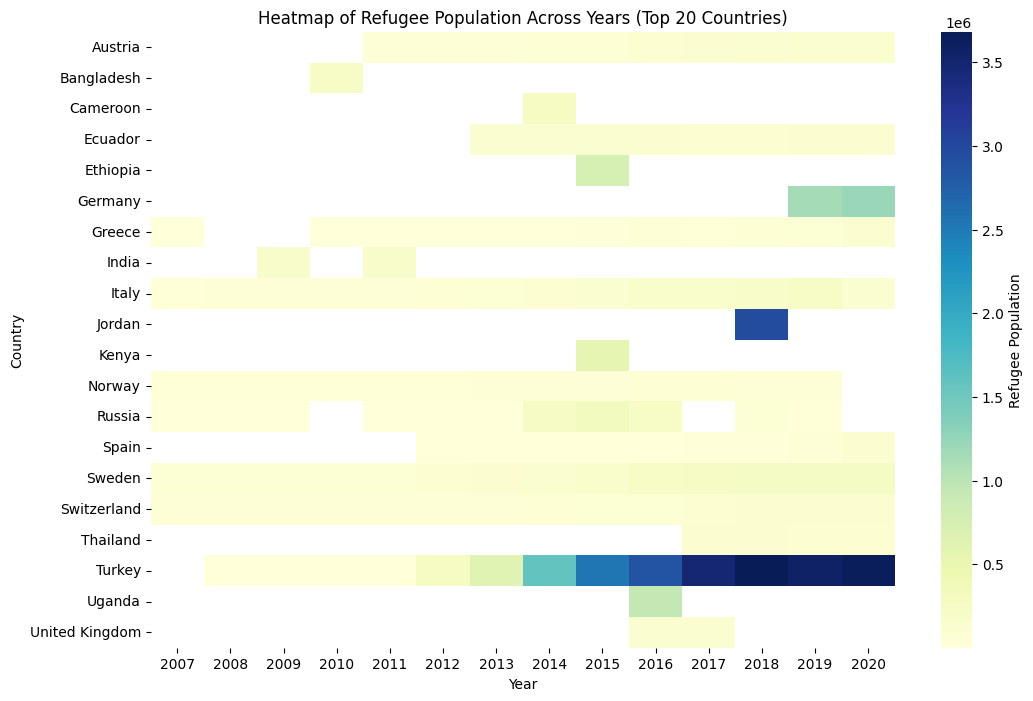

In [8]:
import seaborn as sns

# Get the top 20 countries by total refugee population across all years
top_countries = gdf.groupby('Country')['Refugee population'].sum().nlargest(20).index

# Filter the GeoDataFrame to include only the top 20 countries
top_gdf = gdf[gdf['Country'].isin(top_countries)]

# Heatmap of Refugee Population for the top 20 countries
plt.figure(figsize=(12, 8))
heatmap_data = top_gdf.pivot(index='Country', columns='Year', values='Refugee population')
sns.heatmap(heatmap_data, cmap='YlGnBu', cbar_kws={'label': 'Refugee Population'})
plt.title('Heatmap of Refugee Population Across Years (Top 20 Countries)')
plt.show()


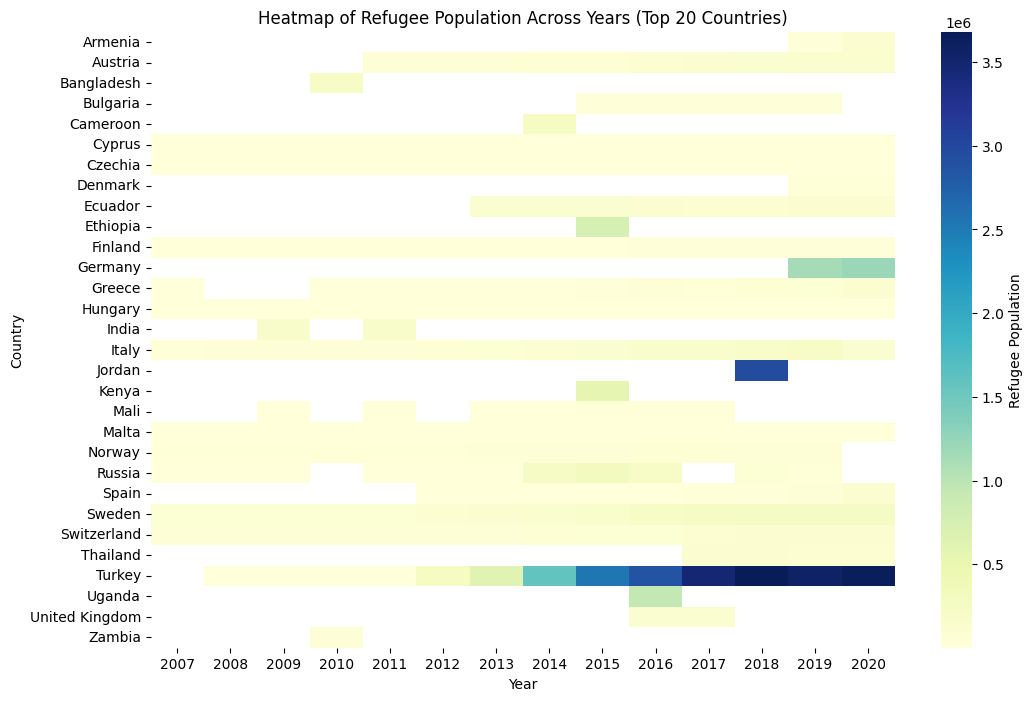

In [9]:
import seaborn as sns

# Get the top 20 countries by total refugee population across all years
top_countries = gdf.groupby('Country')['Refugee population'].sum().nlargest(30).index

# Filter the GeoDataFrame to include only the top 20 countries
top_gdf = gdf[gdf['Country'].isin(top_countries)]

# Heatmap of Refugee Population for the top 20 countries
plt.figure(figsize=(12, 8))
heatmap_data = top_gdf.pivot(index='Country', columns='Year', values='Refugee population')
sns.heatmap(heatmap_data, cmap='YlGnBu', cbar_kws={'label': 'Refugee Population'})
plt.title('Heatmap of Refugee Population Across Years (Top 20 Countries)')
plt.show()


   Year Country of origin Country of origin (ISO)       Country of asylum  \
0  1989       Afghanistan                     AFG                Pakistan   
1  1988       Afghanistan                     AFG                Pakistan   
2  1990       Afghanistan                     AFG                Pakistan   
3  1991       Afghanistan                     AFG  Iran (Islamic Rep. of)   
4  1987       Afghanistan                     AFG                Pakistan   

  Country of asylum (ISO)  Sum of Refugees  
0                     PAK          3272290  
1                     PAK          3254393  
2                     PAK          3253000  
3                     IRN          3186616  
4                     PAK          3156000  


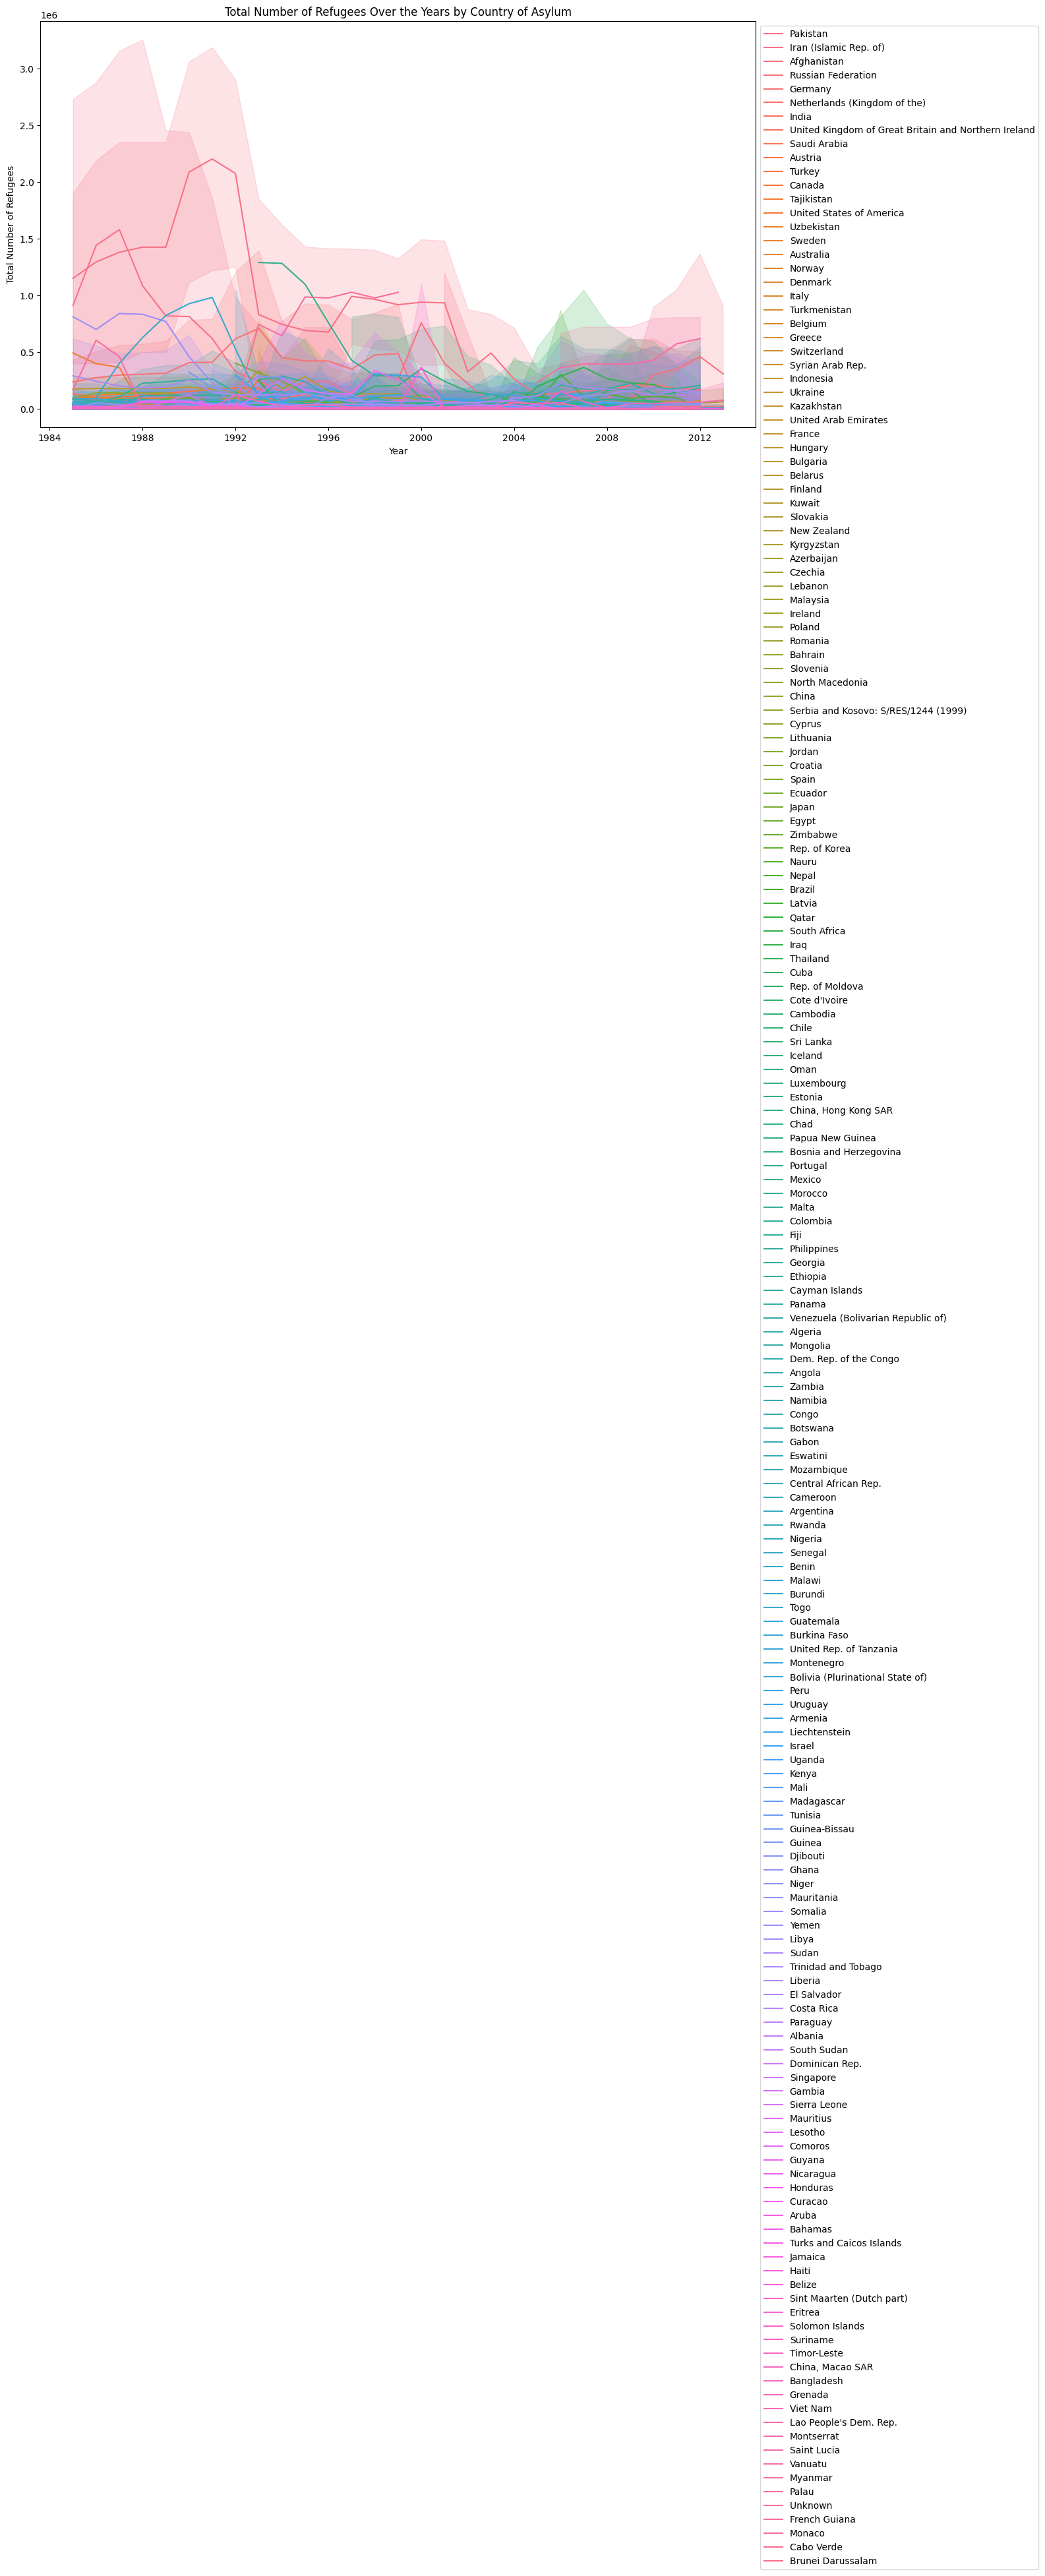

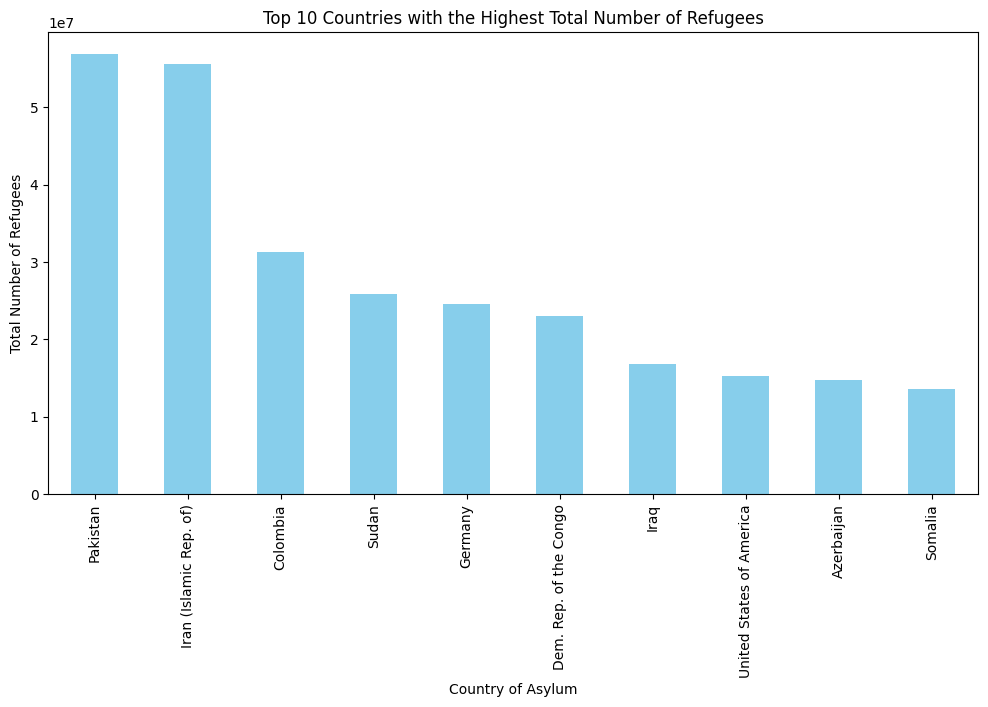

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_path = 'rawdatatoload.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

# Convert columns to appropriate data types
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Summary statistics
summary_stats = df.groupby('Country of asylum')['Sum of Refugees'].describe()

# Line plot for the total number of refugees over the years
plt.figure(figsize=(14, 8))
sns.lineplot(x='Year', y='Sum of Refugees', hue='Country of asylum', data=df)
plt.title('Total Number of Refugees Over the Years by Country of Asylum')
plt.xlabel('Year')
plt.ylabel('Total Number of Refugees')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# Bar plot for the top 10 countries with the highest total number of refugees
top_countries = df.groupby('Country of asylum')['Sum of Refugees'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with the Highest Total Number of Refugees')
plt.xlabel('Country of Asylum')
plt.ylabel('Total Number of Refugees')
plt.show()


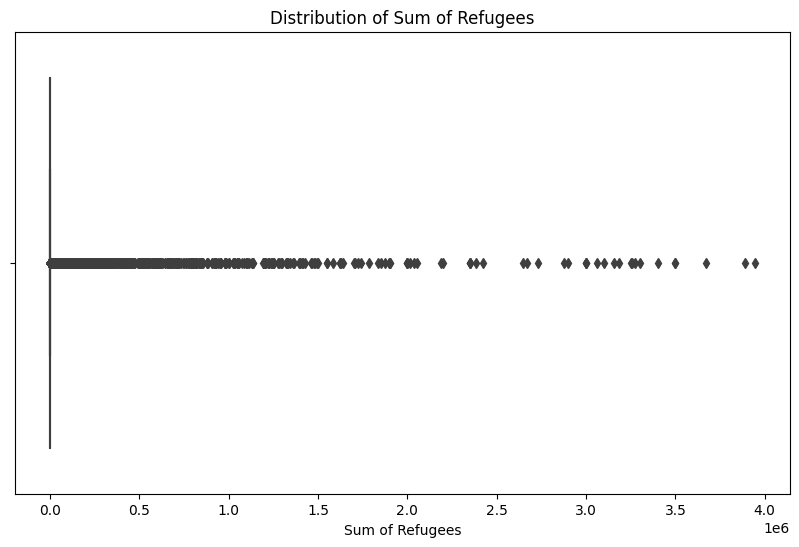

In [11]:
# Boxplot for the 'Sum of Refugees' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Sum of Refugees'])
plt.title('Distribution of Sum of Refugees')
plt.show()


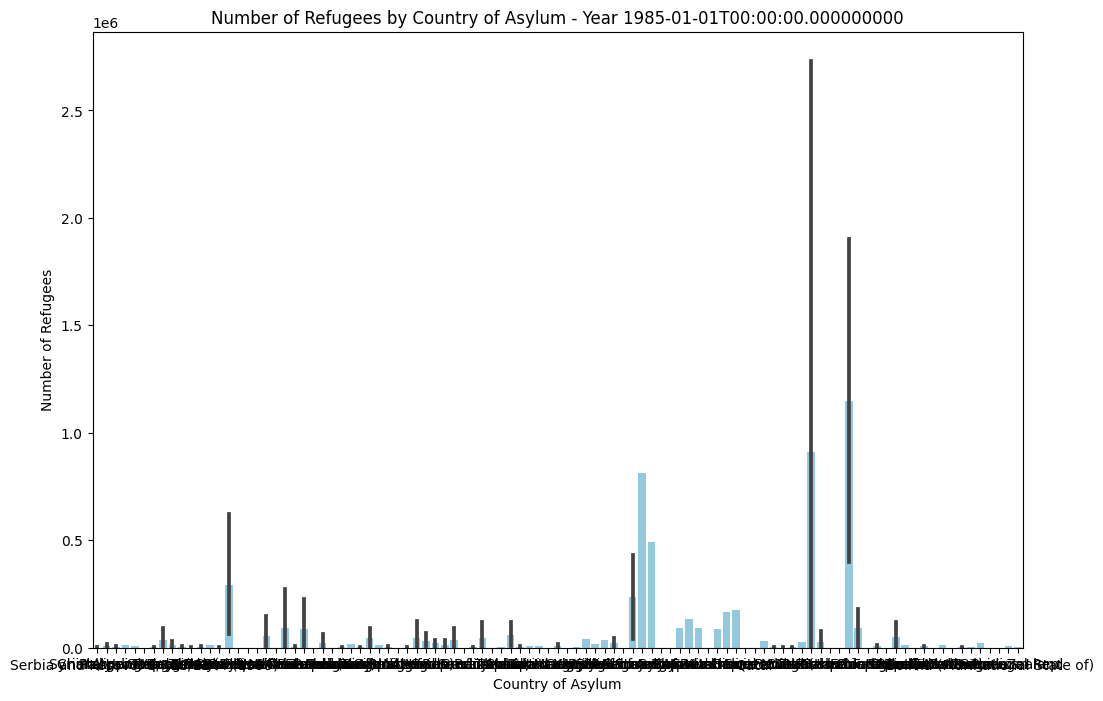

In [16]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Sort the DataFrame by 'Year' for better animation
df_sorted = df.sort_values(by='Year')

# Animated bar plot for the change in the number of refugees over the years
def update(frame):
    plt.clf()
    data = df_sorted[df_sorted['Year'] == years[frame]]
    sns.barplot(x='Country of asylum', y='Sum of Refugees', data=data, color='skyblue')
    plt.title(f'Number of Refugees by Country of Asylum - Year {years[frame]}')
    plt.xlabel('Country of Asylum')
    plt.ylabel('Number of Refugees')

# Get unique years in the dataset
years = df_sorted['Year'].unique()

# Set up the animation
fig, ax = plt.subplots(figsize=(12, 8))
ani = animation.FuncAnimation(fig, update, frames=len(years), repeat=False)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

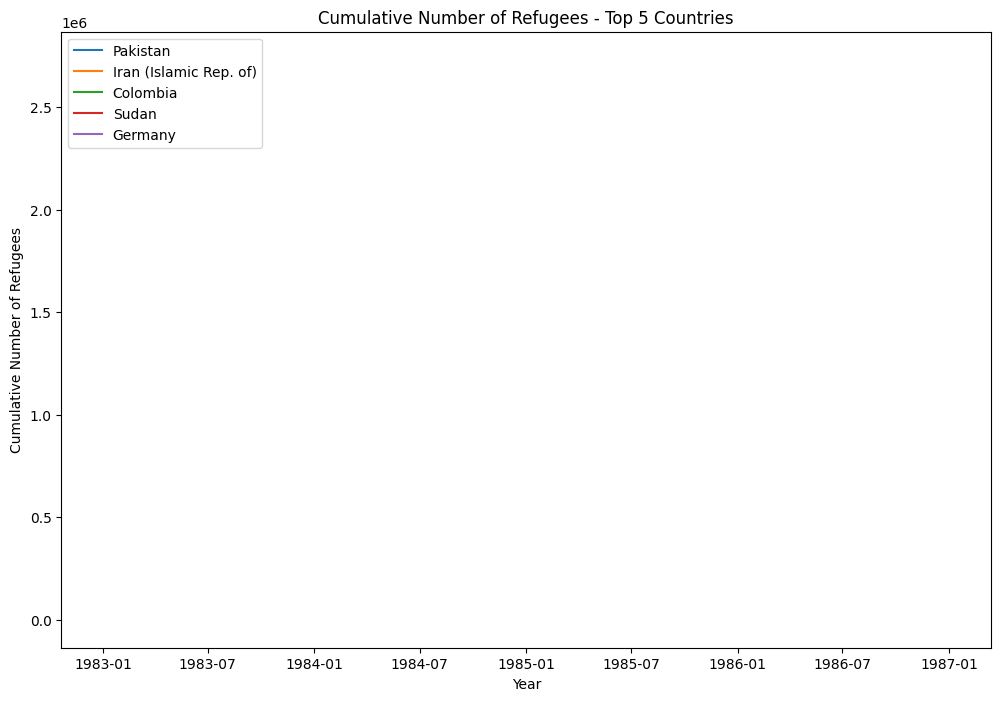

In [19]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from IPython.display import HTML

# Sort the DataFrame by 'Sum of Refugees' for better selection of top countries
df_sorted_by_sum = df.groupby('Country of asylum')['Sum of Refugees'].sum().sort_values(ascending=False).reset_index()

# Select the top 5 countries with the highest total number of refugees
top_countries = df_sorted_by_sum.head(5)['Country of asylum'].tolist()

# Filter the DataFrame to include only the top 5 countries
df_top_countries = df[df['Country of asylum'].isin(top_countries)]

# Sort the filtered DataFrame by 'Year'
df_top_sorted = df_top_countries.sort_values(by=['Country of asylum', 'Year'])

# Animated line plot for the cumulative number of refugees over the years
def update(frame):
    plt.clf()
    data = df_top_sorted[df_top_sorted['Year'] <= years[frame]]
    cumulative_data = data.groupby(['Country of asylum', 'Year'])['Sum of Refugees'].sum().groupby('Country of asylum').cumsum().reset_index()

    for country in top_countries:
        country_data = cumulative_data[cumulative_data['Country of asylum'] == country]
        plt.plot(country_data['Year'], country_data['Sum of Refugees'], label=country)

    plt.title(f'Cumulative Number of Refugees - Top 5 Countries')
    plt.xlabel('Year')
    plt.ylabel('Cumulative Number of Refugees')
    plt.legend(loc='upper left')

# Get unique years in the dataset
years = df_top_sorted['Year'].unique()

# Set up the animation
fig, ax = plt.subplots(figsize=(12, 8))
ani = animation.FuncAnimation(fig, update, frames=len(years), repeat=False)

# Save the animation as a gif using PillowWriter
ani.save('/content/animated_line_plot.gif', writer='pillow', fps=1)

# Provide a link to download the gif
from google.colab import files
files.download('/content/animated_line_plot.gif')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

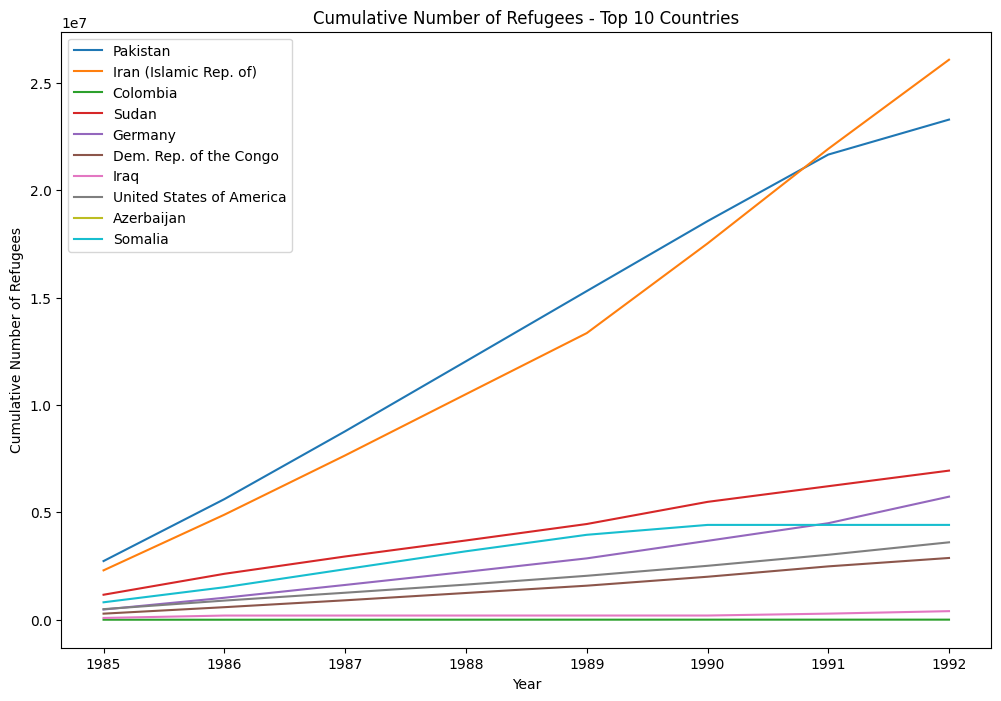

In [20]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from IPython.display import HTML

# Sort the DataFrame by 'Sum of Refugees' for better selection of top countries
df_sorted_by_sum = df.groupby('Country of asylum')['Sum of Refugees'].sum().sort_values(ascending=False).reset_index()

# Select the top 10 countries with the highest total number of refugees
top_countries = df_sorted_by_sum.head(10)['Country of asylum'].tolist()

# Filter the DataFrame to include only the top 10 countries
df_top_countries = df[df['Country of asylum'].isin(top_countries)]

# Sort the filtered DataFrame by 'Year'
df_top_sorted = df_top_countries.sort_values(by=['Country of asylum', 'Year'])

# Animated line plot for the cumulative number of refugees over the years
def update(frame):
    plt.clf()
    data = df_top_sorted[df_top_sorted['Year'] <= years[frame]]
    cumulative_data = data.groupby(['Country of asylum', 'Year'])['Sum of Refugees'].sum().groupby('Country of asylum').cumsum().reset_index()

    for country in top_countries:
        country_data = cumulative_data[cumulative_data['Country of asylum'] == country]
        plt.plot(country_data['Year'], country_data['Sum of Refugees'], label=country)

    plt.title(f'Cumulative Number of Refugees - Top 10 Countries')
    plt.xlabel('Year')
    plt.ylabel('Cumulative Number of Refugees')
    plt.legend(loc='upper left')

# Get unique years in the dataset
years = df_top_sorted['Year'].unique()

# Set up the animation
fig, ax = plt.subplots(figsize=(12, 8))
ani = animation.FuncAnimation(fig, update, frames=len(years), repeat=False)

# Save the animation as a gif using PillowWriter
ani.save('/content/animated_line_plot.gif', writer='pillow', fps=1)

# Provide a link to download the gif
from google.colab import files
files.download('/content/animated_line_plot.gif')


In [22]:
import plotly.express as px

# Assuming your DataFrame is named 'df'
fig = px.sunburst(df,
                  path=['Country of origin', 'Country of asylum'],
                  values='Sum of Refugees',
                  title='Flow of Refugees from Country of Origin to Country of Asylum')

fig.update_layout(margin=dict(l=0, r=0, b=0, t=40))  # Adjust layout for better visualization

fig.show()


In [23]:
fig.write_html("interactive_chart.html")
